In [4]:
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [5]:
train_dir = './train'
test_dir = './test'

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])


c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │     1,382,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,401,866 (5.35 MB)

 Trainable params: 1,401,866 (5.35 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# liberar memoria para amenizar el proceso de entrenamiento
# Liberar la memoria de la GPU
backend.clear_session()


In [11]:
#steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = test_generator.samples // test_generator.batch_size

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [13]:
history = model.fit(
    train_generator,
    #steps_per_epoch=371,
    steps_per_epoch=63,
    epochs=15,
    validation_data=test_generator,
    #validation_steps=45,
    validation_steps=validation_steps,
    callbacks=[early_stopping]  # Usar EarlyStopping para evitar sobreajuste
)

c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 703ms/step - accuracy: 0.5451 - loss: 0.6914

c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 54s 833ms/step - accuracy: 0.5454 - loss: 0.6912 - val_accuracy: 0.5292 - val_loss: 0.6756
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 526ms/step - accuracy: 0.6142 - loss: 0.6436 - val_accuracy: 0.5000 - val_loss: 0.6542
Epoch 3/15


c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 544ms/step - accuracy: 0.6615 - loss: 0.6162 - val_accuracy: 0.7787 - val_loss: 0.5866
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 425ms/step - accuracy: 0.7131 - loss: 0.5696 - val_accuracy: 0.7500 - val_loss: 0.5751
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 524ms/step - accuracy: 0.7289 - loss: 0.5333 - val_accuracy: 0.7848 - val_loss: 0.5299
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 351ms/step - accuracy: 0.7490 - loss: 0.5240 - val_accuracy: 0.6875 - val_loss: 0.5258
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 525ms/step - accuracy: 0.7557 - loss: 0.4919 - val_accuracy: 0.5575 - val_loss: 0.9264
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 409ms/step - accuracy: 0.7399 - loss: 0.5323 - val_accuracy: 0.6875 - val_loss: 0.4844
Epoch 9/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 510ms/step - accuracy: 0.7922 - loss: 0.4542 - val_accuracy: 0.6210 - val_loss: 0.6802
Epoch 10/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 405ms/step - accuracy: 0.7604 - loss: 0.4915 - val_accuracy: 0.62

In [14]:
# Guardar el modelo completo
model.save('models/15_cnn.h5')

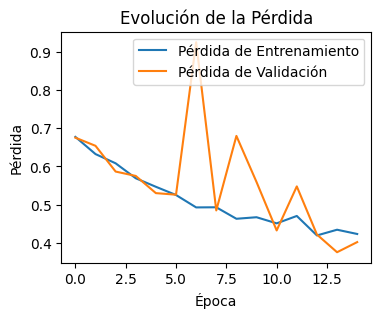

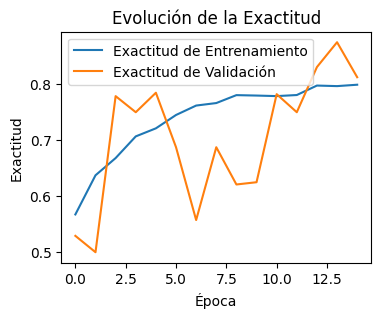

In [15]:
# Graficar la pérdida
plt.figure(figsize=(4, 3))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Evolución de la Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la exactitud
plt.figure(figsize=(4, 3))
plt.plot(history.history['accuracy'], label='Exactitud de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Exactitud de Validación')
plt.title('Evolución de la Exactitud')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.legend()
plt.show()

In [14]:
from IPython.display import display, HTML

html_content = """
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Gráficas</title>
</head>
<body>
    <p>Esto no es exactamente lo que buscamos, ya que la gráfica que estamos buscando se parece más a esta:</p>
    <img src="img/perdida.png" alt="Gráfica Correcta" width="250">
    <img src="img/bien_entrenado.png" alt="Gráfica Correcta" width="250">
</body>
</html>
"""

# Mostrar el contenido HTML en el notebook
display(HTML(html_content))

Crearemos un nuevo modelo con menos capas para ver que resultado obtenemos

In [16]:
model = tf.keras.models.load_model('models/14_cnn.h5')

In [17]:
# Mostrar precision y perdida del modelo
loss, acc = model.evaluate(test_generator)
print(f'Pérdida: {loss}')
print(f'Exactitud: {acc}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.8256 - loss: 0.4419
Pérdida: 0.4374816417694092
Exactitud: 0.824999988079071
